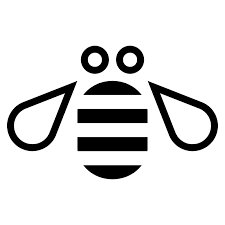


# Here is a capstone project in IBM course aim to analyze and visualize the data

**Dataset**: The data was published by prof Paolo in Universita di Pavia, and the dataset includes financial ratios for a sample of 1505 small medium size companies in Southern Europe in 2015, and the information of their status (0 = active, 1 = default) are assets in 1 year later 


In this Kernel, I use these packages :

- bokeh

- seaborn
    - regplot, lmplot
    - heatmap
    - boxplot
- missingno
- requests + PIL


**Table of Contents**

1. [Data general discription](#1)
2. [Data Exploratory and general visualization](#2)
3. [KMean and Logistic Regression](#3)

# Data general description
<a class="anchor" id="#1"></a>

## Here is the description for all the variable in this project 


| Name    | Formular or Description           | Type of Data       |
| -----------------|-----------------|--------------------|
| RATIO001| Total Assets/ Equity| Continuos|
| RATIO002| (Long term debt + Loans)/Shareholders Funds| Continuos|
| RATIO003| Total Assets/Total Liabilities| Continuos|
| RATIO004| Current Assets/Current Liabilities (Current Ratio)| Continuos|
|RATIO005| (Current assets - Current assets: stocks)/Current liabilities| Continuous|
|RATIO006| (Shareholders Funds + Non-current liabilities)/Fixed assets| Continuous|
|RATIO008| EBIT/interest paid| Continuous|
|RATIO011| (Profit or Loss before tax + Interest paid)/Total assets| Continuous|
|RATIO012| Return on Equity (ROE)| Continuous|
|RATIO017| Operating revenues/Total assets| Continuous|
|RATIO018| Sales/Total assets (Activity Ratio)| Continuous
|RATIO019| Interest paid/(Profit before taxes + Interest paid)| Continuous
|RATIO027| EBITDA/Interest paid| Continuous
|RATIO029| EBITDA/Operating revenues| Continuous
|RATIO030| EBITDA/Sales| Continuous|
|RATIO036| Negative EBIT Dummy (=1 if EBIT < 0, 0 otherwise)| Binary
|RATIO037| Loss before tax Dummy (=1 if Profit before tax < 0, 0 otherwise)| Binary
RATIO039| Financial Loss Dummy (=1 if Financial Profit < 0, 0 otherwise)| Binary
RATIO040| Net Loss Dummy (=1 if Net Profit < 0, 0 otherwise)| Binary
DPO Trade| Payables/Operating Revenues| Continuous
DSO Trade| Receivables/Operating Revenues| Continuous
DIO| Inventories/Operating Revenues| Continuous
Turnover| Turnover| Continuous
Sector| code Letter identifying the economic sector (see the ”Sector codes” file)| Categorical
Status| Default or Not| BInary






In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 5)) # change the size of the plot
plt.style.use('ggplot') # ggplot style in R 

from bokeh.io import show, output_notebook
from bokeh.palettes import Spectral9
from bokeh.plotting import figure

import seaborn as sns
sns.set_palette('husl')
sns.set(style="white")

from wordcloud import WordCloud # wordcloud
import missingno as msno # check missing value

pd.set_option('display.max_columns', 500)

## Data Exploratory and general visualization  <a name = '#2'> </a>

In [326]:
data = pd.read_excel('dataset_2_credit.xlsx', index_col = 'id')

In [327]:
data.head()

,status,ratio001,ratio002,ratio003,ratio004,ratio005,ratio006,ratio008,ratio011,ratio012,ratio017,ratio018,ratio019,ratio027,ratio029,ratio030,ratio036,ratio037,ratio039,ratio040,DIO,DPO,DSO,turnover,sector_code
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,-1.16,-0.68,0.14,1.60,0.87,2.23,-16.29,-0.27,-0.05,2.66,2.68,-0.06,-11.62,-0.07,-0.07,1,1,1,1,48,31,12,4276,G
2,1,-1.64,-0.03,0.39,0.33,0.33,-9.24,-185.17,-1.17,-0.75,2.23,2.03,-0.01,-160.73,-0.46,-0.50,1,1,1,1,0,139,117,323,H
3,1,-2.92,-2.38,0.66,0.26,0.13,0.67,-2.38,-0.01,-0.02,0.05,0.02,-0.42,4.16,0.27,0.68,1,1,1,1,410,913,22,255,C
4,1,1.15,0.04,1.87,2.68,1.09,21.39,-59.74,-0.12,-0.27,0.33,0.34,-0.02,-53.64,-0.33,-0.33,1,1,1,1,630,170,86,238,C
5,1,-3.47,0.00,0.71,0.84,0.84,-22.65,22.55,-1.33,-3.48,0.96,0.96,-0.03,22.79,0.88,0.88,0,1,1,1,0,0,0,200,M


In [328]:
data.describe(include = 'all')

,status,ratio001,ratio002,ratio003,ratio004,ratio005,ratio006,ratio008,ratio011,ratio012,ratio017,ratio018,ratio019,ratio027,ratio029,ratio030,ratio036,ratio037,ratio039,ratio040,DIO,DPO,DSO,turnover,sector_code
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.00000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.00000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415
mean,0.107641,8.742877,1.233561,1.458312,1.536432,1.170498,6.84315,24.816439,0.028146,-0.086864,1.356817,1.320990,0.203787,39.602904,0.063362,0.070120,0.178738,0.20598,0.938206,0.232558,105.589369,78.186047,98.307641,3398.334884,NaN
std,0.310030,18.558572,3.238319,0.791637,1.107263,0.905753,20.30579,75.346671,0.150193,0.870065,1.003045,1.000015,0.499218,99.038680,0.185920,0.222216,0.383260,0.40455,0.240861,0.422603,334.487726,118.572190,134.829020,7420.099531,NaN
min,0.000000,-52.100000,-8.060000,0.140000,0.050000,0.010000,-26.53000,-254.950000,-1.330000,-8.480000,0.020000,0.000000,-3.150000,-190.600000,-1.510000,-2.660000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,NaN
25%,0.000000,1.260000,0.000000,1.070000,0.990000,0.650000,0.96000,1.210000,0.010000,0.000000,0.710000,0.680000,0.010000,2.570000,0.020000,0.020000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,617.000000,NaN
50%,0.000000,3.570000,0.100000,1.210000,1.240000,0.980000,1.79000,3.500000,0.030000,0.060000,1.150000,1.120000,0.100000,7.390000,0.060000,0.060000,0.000000,0.00000,1.000000,0.000000,22.000000,53.000000,72.000000,1108.000000,NaN
75%,0.000000,9.870000,1.140000,1.540000,1.740000,1.410000,4.53000,17.900000,0.070000,0.210000,1.730000,1.700000,0.400000,30.120000,0.110000,0.120000,0.000000,0.00000,1.000000,0.000000,84.000000,99.000000,135.000000,2714.000000,NaN


## Visualize all the missing data using missingno

`missingno` is a toolset allow us to quickly visualize the incomplete dataset of each variable

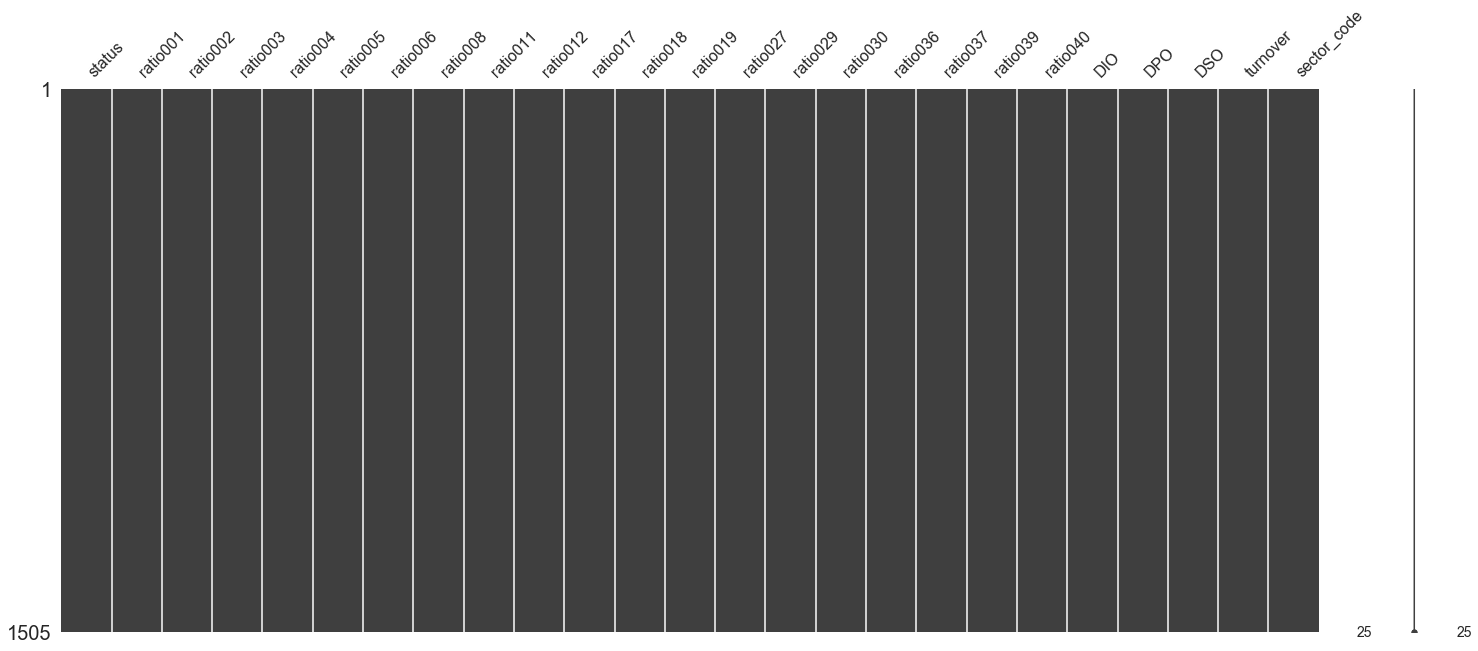

In [329]:
msno.matrix(data)

In [330]:
print(data.columns)

Index(['status', 'ratio001', 'ratio002', 'ratio003', 'ratio004', 'ratio005',
       'ratio006', 'ratio008', 'ratio011', 'ratio012', 'ratio017', 'ratio018',
       'ratio019', 'ratio027', 'ratio029', 'ratio030', 'ratio036', 'ratio037',
       'ratio039', 'ratio040', 'DIO', 'DPO', 'DSO', 'turnover', 'sector_code'],
      dtype='object')


In [331]:
df = data.drop(['sector_code'], axis=1)

In [332]:
corr = df.corr()

In [333]:
mask = np.zeros_like(corr, dtype=np.bool) # plot only the bottom of the triangle
mask[np.triu_indices_from(mask)] = True

In [334]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

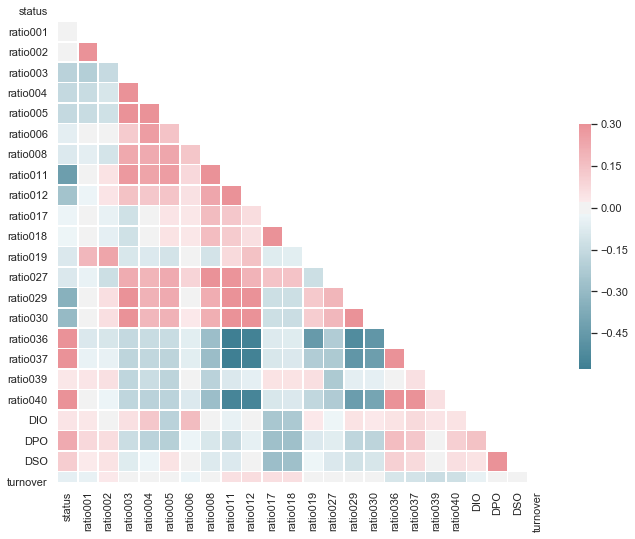

In [335]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Knn analysis

In [336]:
from sklearn.neighbors import KNeighborsClassifier
X = df.drop('status', axis =1 ).values # change data back to array 
y = df['status'].values

In [337]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 30, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1204, 23), (1204,), (301, 23), (301,))

In [338]:
neighbors = np.arange(1,12)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [339]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

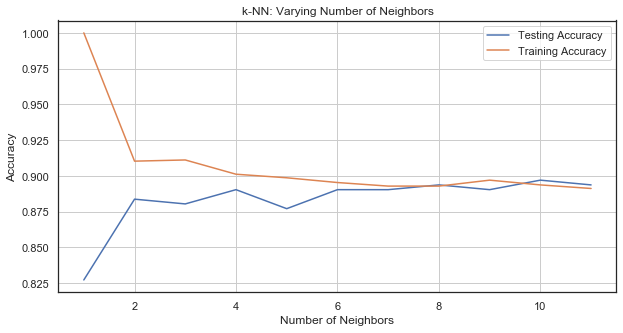

In [340]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

From here we can see that when n = 8 the test and training accuracy is almost equal, hence the overfiting and underfitting is limited most. Consequently, for this model, we use n = 8, and the accuracy rate for the test set is 0.89368

In [341]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

# Logistic regression

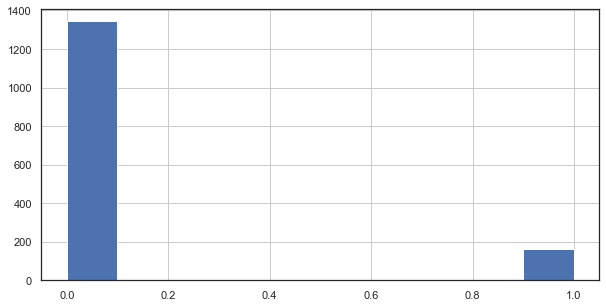

In [342]:
data['status'].hist()

In [343]:
train, test= train_test_split(data, test_size = 0.2, random_state = 30)

In [344]:
train_cols = train.columns[1:]

In [345]:
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.240158
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1204
Model:                          Logit   Df Residuals:                     1181
Method:                           MLE   Df Model:                           22
Date:                Mon, 18 Nov 2019   Pseudo R-squ.:                  0.2983
Time:                        04:37:09   Log-Likelihood:                -289.15
converged:                       True   LL-Null:                       -412.08
Covariance Type:            nonrobust   LLR p-value:                 9.692e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001      0.006      0.022      0.982      -0.012       0.012
x2             0.0233      0.

## Here we can see that we have problem with p-value, this might be due to the multicollinear problem in which a lot of variable are correlated. I firstly test with the test set

In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [347]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

C:\Users\meoda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.920265780730897

- Although the R^2 score is good but, similar to most regression model, the R^2 will increase when we input more variable, consequently, we have to look at the correlation matrix and do Wald test to identify the which variable has the multicollinear effect 
- 05/04/2019 continue update